In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('./alldata_1_for_kaggle.csv',encoding='latin1')

In [5]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [6]:
df = df.rename({'0':'Cancer','a':'Research paper text'},axis=1)
df.head()

,Unnamed: 0,Cancer,Research paper text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [7]:
#Printing few random entries
df.sample(3)

,Unnamed: 0,Cancer,Research paper text
756,756,Lung_Cancer,"""However it remains to be elucidated whether N..."
6180,6180,Thyroid_Cancer,thyroid stimulating hormone highlightspleiotro...
3162,3162,Thyroid_Cancer,prevalence of pathogenic variants in DnA dama...


In [8]:
# Checking the number of rows and columns
print("The Dataset contains " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns")

The Dataset contains 7570 rows and 3 columns


In [9]:
#Check for duplicate values
print("Duplicate entries in the dataset: " + str(df.duplicated().sum()))

Duplicate entries in the dataset: 0


In [10]:
#Check for null values in the dataset
df.isnull().sum()

Unnamed: 0             0
Cancer                 0
Research paper text    0
dtype: int64

In [11]:
# Check null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7570 non-null   int64 
 1   Cancer               7570 non-null   object
 2   Research paper text  7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


In [12]:
#Checking properties of data
df.describe()

,Unnamed: 0
count,7570.000000
mean,3784.500000
std,2185.415102
min,0.000000
25%,1892.250000
50%,3784.500000
75%,5676.750000
max,7569.000000


In [13]:
cancer_types = df['Cancer'].value_counts()

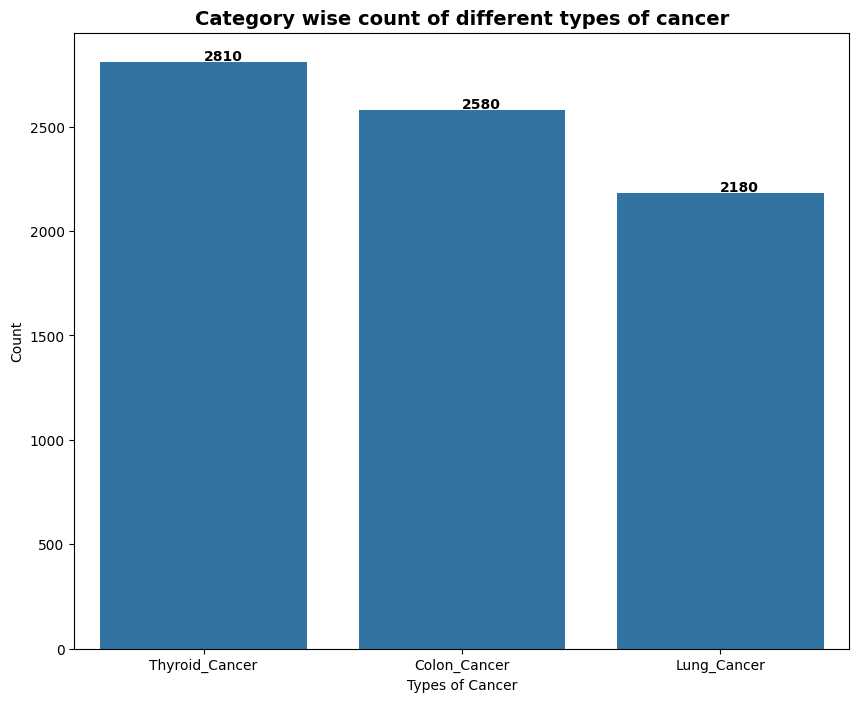

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plot = sns.barplot(x=cancer_types.index,y=cancer_types.values)
plt.xlabel("Types of Cancer")
plt.ylabel("Count")
plt.title("Category wise count of different types of cancer",
          fontweight='bold',
          fontsize='14')
for i,v in enumerate(cancer_types.values):
    plot.text(i,v+10,str(v),fontweight='bold')
plt.show()

In [15]:
df = df.drop('Unnamed: 0',axis=1)

In [16]:
import nltk
nltk.download()
from nltk.corpus import stopwords         # to get a list of stopwords
from nltk.tokenize import word_tokenize   # for tokenization of words
from nltk.stem import WordNetLemmatizer   # to find root words
from string import punctuation            # to get a list of puncutation symbols

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [17]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra spaces
    text = " ".join(text.split())

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Apply the function to your dataframe
# Assuming your dataframe is named 'data' and the text column is 'a'
df['Clean Research paper text'] = df['Research paper text'].apply(preprocess_text)
df.head()


[nltk_data] Downloading package punkt to C:\Users\USER
[nltk_data]     DK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USER
[nltk_data]     DK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\USER
[nltk_data]     DK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Cancer,Research paper text,Clean Research paper text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",adopted strategy used prior year based four ex...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,study aimed investigate serum matrix metallopr...


C:\Users\USER DK\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


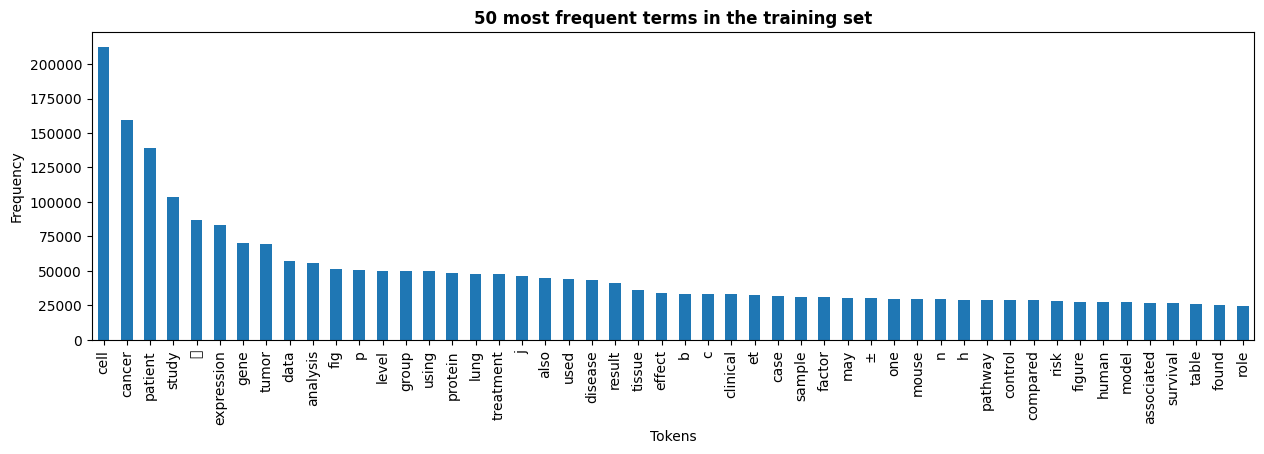

In [18]:
 #Get 50 most frequent words in the training set
frequent_words = pd.Series(' '.join(df['Clean Research paper text']).split()).value_counts()[:50]
frequent_words.plot.bar(figsize=(15,4))
plt.title('50 most frequent terms in the training set', fontweight="bold")
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

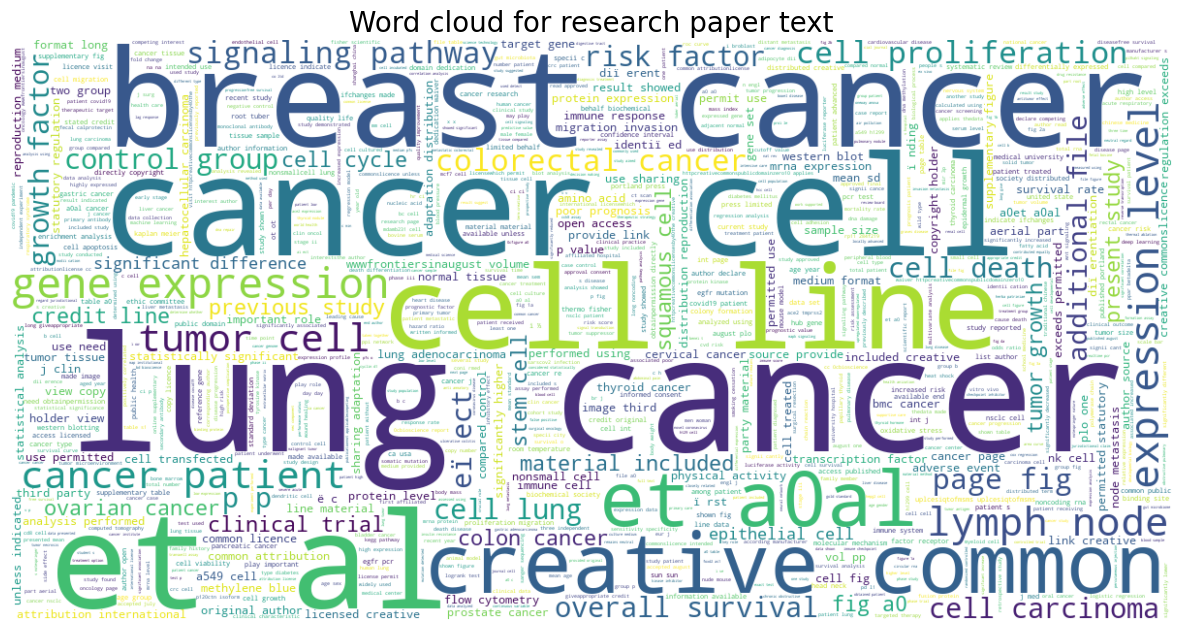

In [19]:
# creating a wordcloud
from wordcloud import WordCloud
data = df['Clean Research paper text']
data_string = ' '.join(data)
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for research paper text',fontsize = 20)
plt.show()

In [20]:
# The variable 'frequent_words' takes up a lot of RAM! So, we will clean it from the memory!
import gc

del frequent_words

gc.collect()

13284

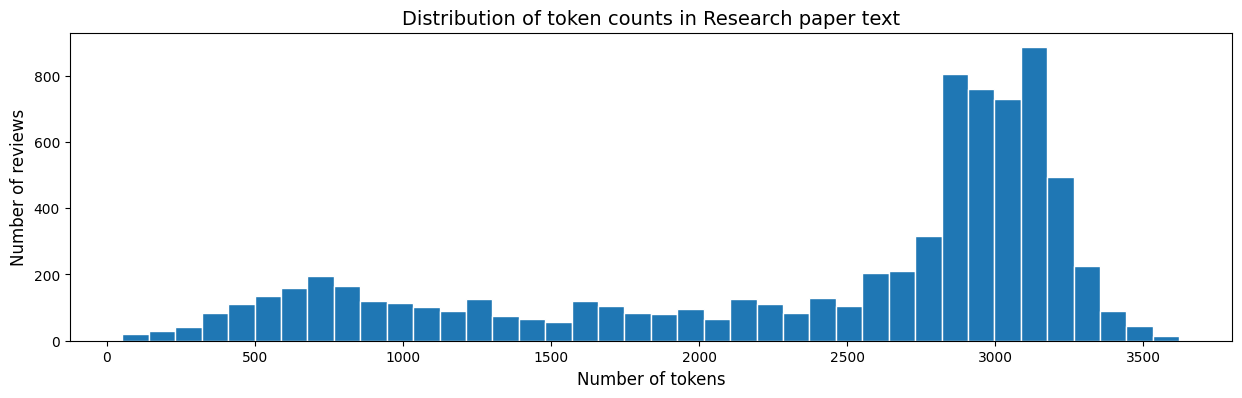

In [21]:
# Plot the number of tokens in cleaned reviews
plt.figure(figsize=(15,4))
plt.hist(df['Clean Research paper text'].apply(lambda x:len(x.split())), bins=40, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of reviews',fontsize=12)
plt.title('Distribution of token counts in Research paper text', fontsize=14)
plt.show()

In [22]:
# Remove original text column from dataset
df = df.drop(columns=['Research paper text'])
df.head()

,Cancer,Clean Research paper text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy used prior year based four ex...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,study aimed investigate serum matrix metallopr...


In [23]:
#train dataset
train = df
train.head()

,Cancer,Clean Research paper text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy used prior year based four ex...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,study aimed investigate serum matrix metallopr...


In [24]:
#Test dataset
test = df.drop(columns=['Cancer'],axis=0)
test.head()

,Clean Research paper text
0,thyroid surgery child single institution osama...
1,adopted strategy used prior year based four ex...
2,coronary arterybypass grafting thrombosis ï¬b...
3,solitary plasmacytoma sp skull uncommon clinic...
4,study aimed investigate serum matrix metallopr...


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert lists to NumPy arrays
X = np.array(train["Clean Research paper text"].values)
Y = np.array(train["Cancer"].values)

# Split into train/validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert test data to NumPy array
x_test = np.array(test["Clean Research paper text"].values)

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_val.shape, y_val.shape)
print("Test data:", x_test.shape)


Training data: (6056,) (6056,)
Validation data: (1514,) (1514,)
Test data: (7570,)


In [26]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 


Number of replicas: 1


In [27]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on CPU
Number of accelerators:  1


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)

max_seq_length = 250

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_seq = pad_sequences(x_train_seq, maxlen=max_seq_length)

x_val_seq = tokenizer.texts_to_sequences(x_val)
x_val_seq = pad_sequences(x_val_seq, maxlen=max_seq_length)

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(x_test_seq, maxlen=max_seq_length)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=250))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 248, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 124, 64)           0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 124, 128)          66048     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 124, 128)          512       
 Normalization)                                                  
                                                      

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

In [32]:
y_train = y_train.astype(float)
y_val = y_val.astype(float)

In [33]:
#training the model on train dataset.
history = model.fit(x_train_seq,
                    y_train,
                    validation_data=(x_val_seq, y_val),
                    callbacks=[earlystopping_cb],
                    batch_size=64,
                    epochs=15,
                    verbose=1,
                   )

Epoch 1/15


95/95 [==============================] - 26s 218ms/step - loss: 0.9512 - acc: 0.5976 - val_loss: 1.0788 - val_acc: 0.3897
Epoch 2/15
95/95 [==============================] - 19s 198ms/step - loss: 0.2497 - acc: 0.9293 - val_loss: 1.0362 - val_acc: 0.3937
Epoch 3/15
95/95 [==============================] - 19s 202ms/step - loss: 0.1058 - acc: 0.9828 - val_loss: 0.9163 - val_acc: 0.8587
Epoch 4/15
95/95 [==============================] - 20s 210ms/step - loss: 0.0572 - acc: 0.9908 - val_loss: 0.6556 - val_acc: 0.9888
Epoch 5/15
95/95 [==============================] - 21s 219ms/step - loss: 0.0441 - acc: 0.9934 - val_loss: 0.3183 - val_acc: 0.9947
Epoch 6/15
95/95 [==============================] - 21s 222ms/step - loss: 0.0313 - acc: 0.9950 - val_loss: 0.1021 - val_acc: 0.9947
Epoch 7/15
95/95 [==============================] - 21s 220ms/step - loss: 0.0259 - acc: 0.9950 - val_loss: 0.0332 - val_acc: 0.9954
Epoch 8/15
95/95 [==============================] - 21s 219ms/step 

In [34]:
# Save the model to a file
model.save('cancer.h5')
# Load the saved model
load_model = tf.keras.models.load_model('cancer.h5')

c:\Users\USER DK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


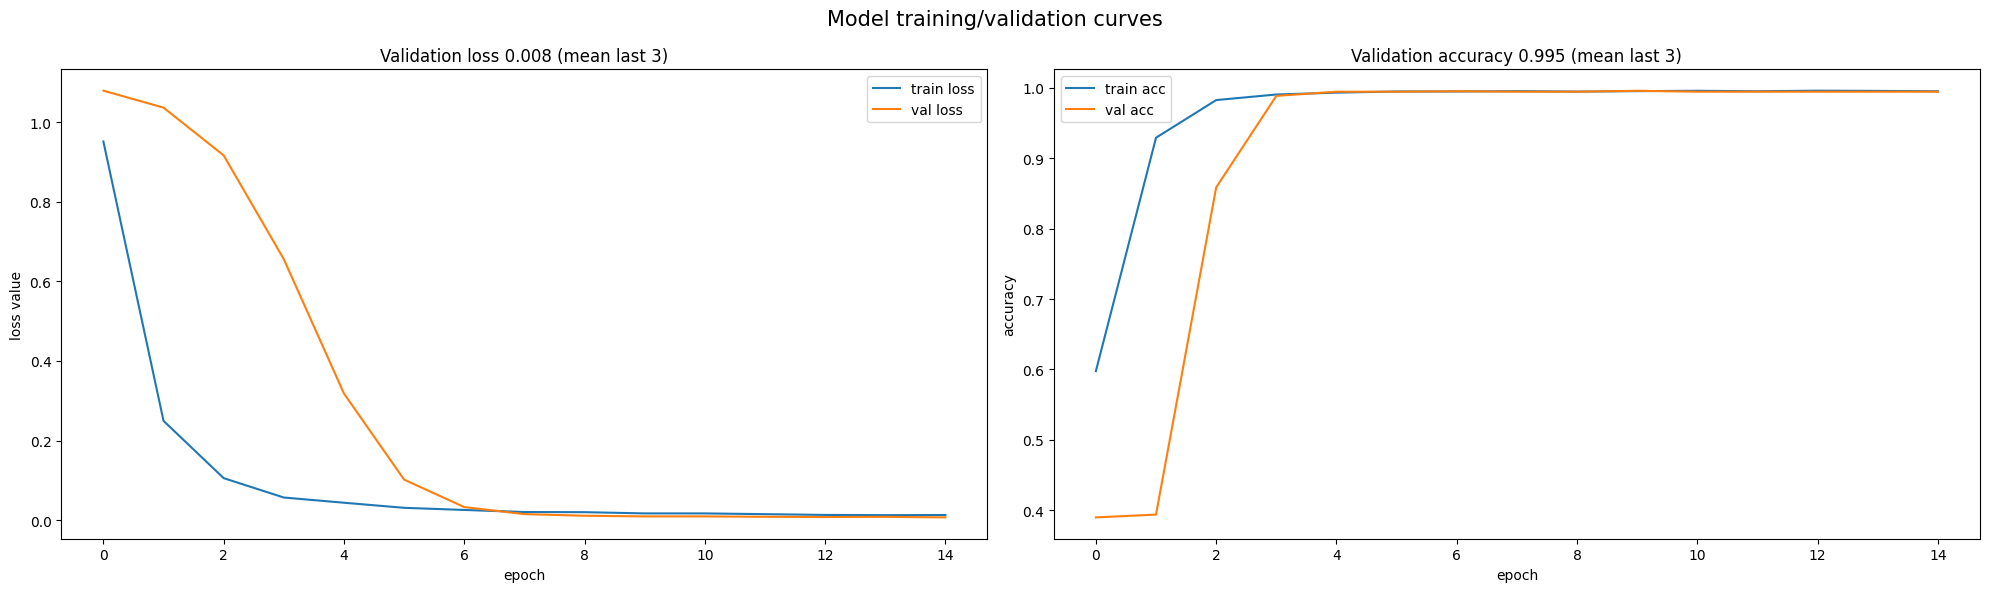

In [35]:
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

In [36]:
test_loss_1, test_acc_1 = model.evaluate(x_val_seq,y_val)

print('Validation loss:', test_loss_1)
print('Validation accuracy:', test_acc_1)

48/48 [==============================] - 2s 32ms/step - loss: 0.0073 - acc: 0.9947
Validation loss: 0.007282712962478399
Validation accuracy: 0.9947159886360168


In [37]:
# Compute validation set predictions
pred = [np.argmax(i) for i in model.predict(x_val_seq)]

48/48 [==============================] - 3s 35ms/step


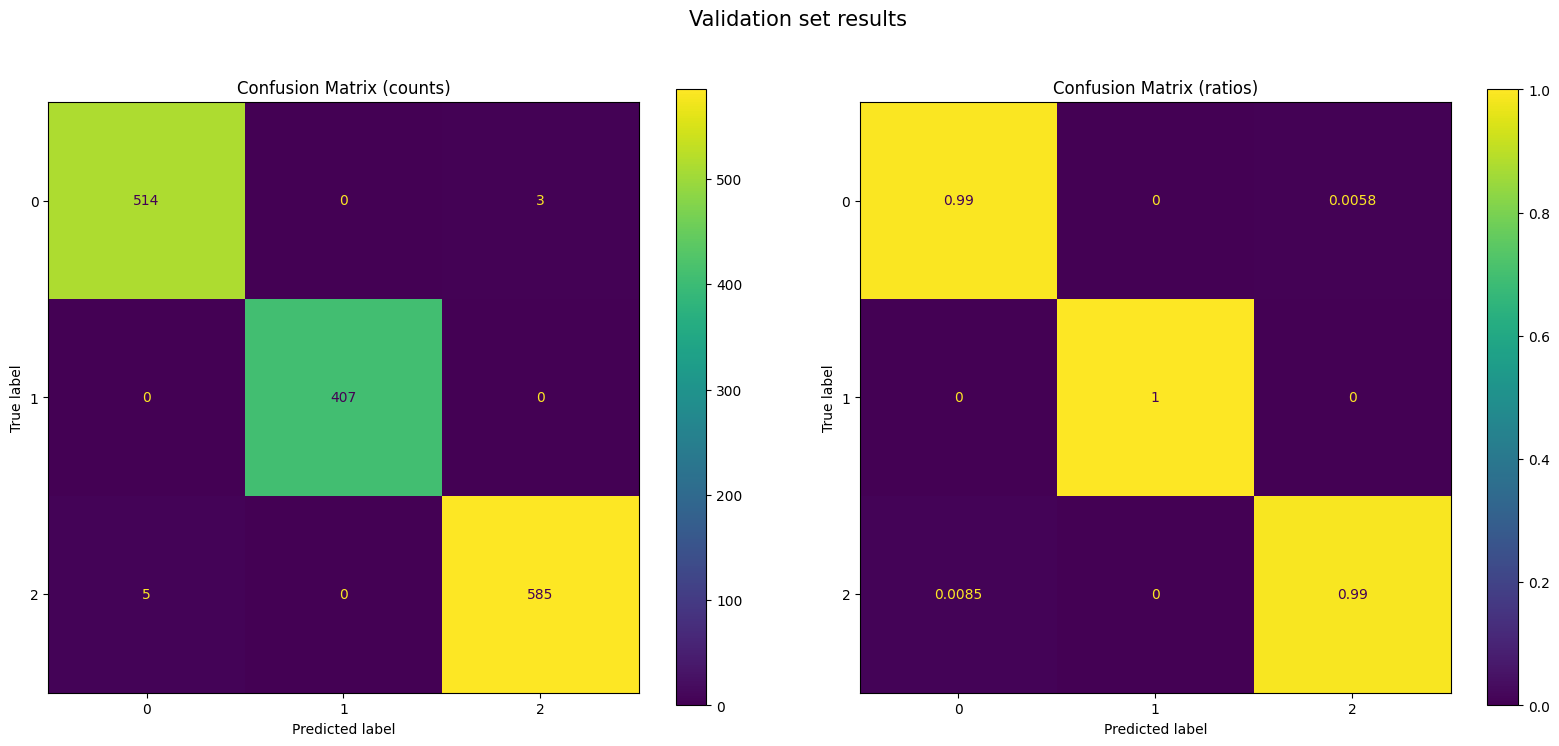

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for raw counts
cm_raw = confusion_matrix(y_val, pred)

# Compute confusion matrix for normalized ratios
cm_norm = confusion_matrix(y_val, pred, normalize='true')

# Create confusion matrix plots
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={"width_ratios": [10, 10], "wspace": 0.1}, subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size = 15)
disp_raw.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix (counts)')
disp_norm.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix (ratios)')
plt.show()

In [39]:
from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train_seq, y_train, epochs=15, validation_data=(x_val_seq, y_val), callbacks=[tensorboard_callback])

Epoch 1/15
190/190 [==============================] - 28s 149ms/step - loss: 0.0170 - acc: 0.9952 - val_loss: 0.0075 - val_acc: 0.9967
Epoch 2/15
190/190 [==============================] - 26s 136ms/step - loss: 0.0198 - acc: 0.9939 - val_loss: 0.0082 - val_acc: 0.9954
Epoch 3/15
190/190 [==============================] - 26s 138ms/step - loss: 0.0124 - acc: 0.9957 - val_loss: 0.0069 - val_acc: 0.9947
Epoch 4/15
190/190 [==============================] - 26s 138ms/step - loss: 0.0129 - acc: 0.9954 - val_loss: 0.0069 - val_acc: 0.9967
Epoch 5/15
190/190 [==============================] - 26s 139ms/step - loss: 0.0135 - acc: 0.9959 - val_loss: 0.0075 - val_acc: 0.9947
Epoch 6/15
190/190 [==============================] - 27s 142ms/step - loss: 0.0161 - acc: 0.9954 - val_loss: 0.0073 - val_acc: 0.9960
Epoch 7/15
190/190 [==============================] - 27s 141ms/step - loss: 0.0140 - acc: 0.9962 - val_loss: 0.0074 - val_acc: 0.9954
Epoch 8/15
190/190 [==============================] - 2

In [40]:
# Compute test set predictions
predictions = [np.argmax(i) for i in model.predict(x_test_seq)]
    
# Create a new DataFrame to merge review ids and the model predictions
submission = pd.DataFrame({'Research Paper Text': test['Clean Research paper text'], 'Type of Cancer': predictions})

# Check few random entries
submission.sample(10)

237/237 [==============================] - 10s 40ms/step


,Research Paper Text,Type of Cancer
7443,posterior reversible encephalopathy syndrome p...,0
3593,cc bruns ga wei jj klickstein lb wong ww fearo...,1
1498,cancer second leading cause death united state...,0
6076,patient diabetes suffer type dmt2dm many study...,2
2462,decreased expression hsp70 caused ibuprofen am...,1
3519,severe acute respiratory syndrome coronavirus ...,0
196,understanding relevantrole line1 retrotranspos...,2
2312,analysis provided 491 interaction 21 3139 inte...,1
5264,complete surgical excision impossible due nodu...,1
3952,background although dendritic cell dc vaccine ...,1


In [45]:
# Calculating the total number of hidden nodes in the neural network
conv1d_neurons = 64
bidirectional_lstm1_neurons = 64 * 2  # It's bidirectional, so double the units
bidirectional_lstm2_neurons = 128 * 2 # Again, double for bidirectionality
dense1_neurons = 32
output_layer_neurons = 6  # Including the output layer for completeness

total_hidden_nodes = (conv1d_neurons + bidirectional_lstm1_neurons +
                      bidirectional_lstm2_neurons + dense1_neurons + 
                      output_layer_neurons)
total_hidden_nodes

486

In [42]:
# Calculating the total number of weights in the neural network

# Embedding Layer
embedding_weights = 20000 * 128

# Conv1D Layer
conv1d_weights = (3 * 128 + 1) * 64

# First Bidirectional LSTM Layer
# For bidirectional, the calculation is doubled
lstm1_input_size = 64  # from Conv1D layer
lstm1_units = 64
bidirectional_lstm1_weights = 2 * (4 * (lstm1_input_size + lstm1_units + 1) * lstm1_units)

# Second Bidirectional LSTM Layer
lstm2_input_size = lstm1_units * 2  # as it's bidirectional
lstm2_units = 128
bidirectional_lstm2_weights = 2 * (4 * (lstm2_input_size + lstm2_units + 1) * lstm2_units)

# First Dense Layer
dense1_input_size = lstm2_units * 2  # from second bidirectional LSTM layer
dense1_units = 32
dense1_weights = (dense1_input_size + 1) * dense1_units

# Output Layer
output_layer_input_size = dense1_units
output_layer_units = 6
output_layer_weights = (output_layer_input_size + 1) * output_layer_units

# Total weights
total_weights = (embedding_weights + conv1d_weights + bidirectional_lstm1_weights +
                 bidirectional_lstm2_weights + dense1_weights + output_layer_weights)
total_weights

2922278